# Task 1 - Context

In [1]:

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import random
from tqdm import tqdm
import time 



# Task 2 - The Data

Dataset information

Network was collected by crawling Amazon website. It is based on Customers Who Bought This Item Also Bought feature of the Amazon website. If a product i is frequently co-purchased with product j, the graph contains an undirected edge from i to j. Each product category provided by Amazon defines each ground-truth community.

We regard each connected component in a product category as a separate ground-truth community. We remove the ground-truth communities which have less than 3 nodes. We also provide the top 5,000 communities with highest quality which are described in our paper. As for the network, we provide the largest connected component. 

## Task
- Explain the dataset itself (e.g., what do the nodes and edges represent?).
- Explain how the dataset is suitable for the project from Task 1. Show a helpful visualization of
(part of) to support your explanation.

In [2]:
#/home/generalpegasus/Documents/Programme/PorfolioExamDataMining/data/twitch/DE/musae_DE_edges.csv
#file_path = Path(os.path.join('..', 'data', 'twitch/DE/musae_DE_edges.csv'))
temporary_file = Path(os.path.join('..', 'data', 'facebook_combined.txt'))
df_graph = pd.read_csv(temporary_file, header=None, names=['from', 'to'], sep=' ')
display(df_graph.head())

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [3]:
file_path = Path(os.path.join('..', 'data', 'com-amazon.ungraph.txt.gz'))
df_graph = pd.read_csv(file_path, compression='gzip', delimiter='\t', skiprows=3).rename(columns={'# FromNodeId': 'from', 'ToNodeId': 'to'})
display(df_graph.head())

,from,to
0,1,88160
1,1,118052
2,1,161555
3,1,244916
4,1,346495


# Task 3 – IDA and Preprocessing

In [4]:
G = nx.from_pandas_edgelist(df_graph, 'from', 'to')

print(f'Number of Edges: {G.size()}')
print(f'Number of Nodes: {G.order()}')



Number of Edges: 925872
Number of Nodes: 334863


## Handshaking Lemma
The Handshaking Lemma is a fundamental rule which states for undirected graphs. 
The sum of the degree of all vertices in an undirected graph is equal to twice the number of edges.

$\sum_{v \in V} \deg(v) = 2 \cdot |E|$

The following code checks whether the graph is undirected by applying the Handshaking Lemma.

For this we first bring the graph `G` into the Adjacency Matrix


In [5]:

A = nx.adjacency_matrix(G)

print(f'Adjacency Matrix shape: \n{A.shape}\n')

print(f'Sum of the Degrees:\n{A.sum()}\n') # Summing up the degree

if A.sum() == 2*G.size():
    print('The Handshake Lemma holds')
else:
    print('The Handshake Lemma does not hold ')


Adjacency Matrix shape: 
(334863, 334863)

Sum of the Degrees:
1851744

The Handshake Lemma holds


## Basic Properties 



In [ ]:
def basic_graph_properties(G):
    print('Number of nodes:', G.number_of_nodes())
    print('Number of edges:', G.number_of_edges())
    print('Density', nx.density(G))
    is_undirected = not nx.is_directed(G)

    print('Is undirected graph?', is_undirected)
    if not nx.is_directed(G):
        print('Number of connected components:', nx.number_connected_components(G))
        largest_cc = max(nx.connected_components(G), key=len)
        print('Size of largest connected component:', len(largest_cc))
    print('Average cluster coefficient:', nx.average_clustering(G))



Number of nodes: 334863
Number of edges: 925872
Density 1.6513834036534368e-05
Is undirected graph? True
Number of connected components: 1
Size of largest connected component: 334863
Average cluster coefficient: 0.3967463932787655


### Degree Distribution
The degree distribution show the frequency of degrees. How often occur a number of degrees of a graph. 

### CCRF
The Complementary Cumulative Relative Frequency (CCRF) of Degrees is a statistical representation that shows the proportion of nodes in a graph whose degree is greater than or equal to a given value.

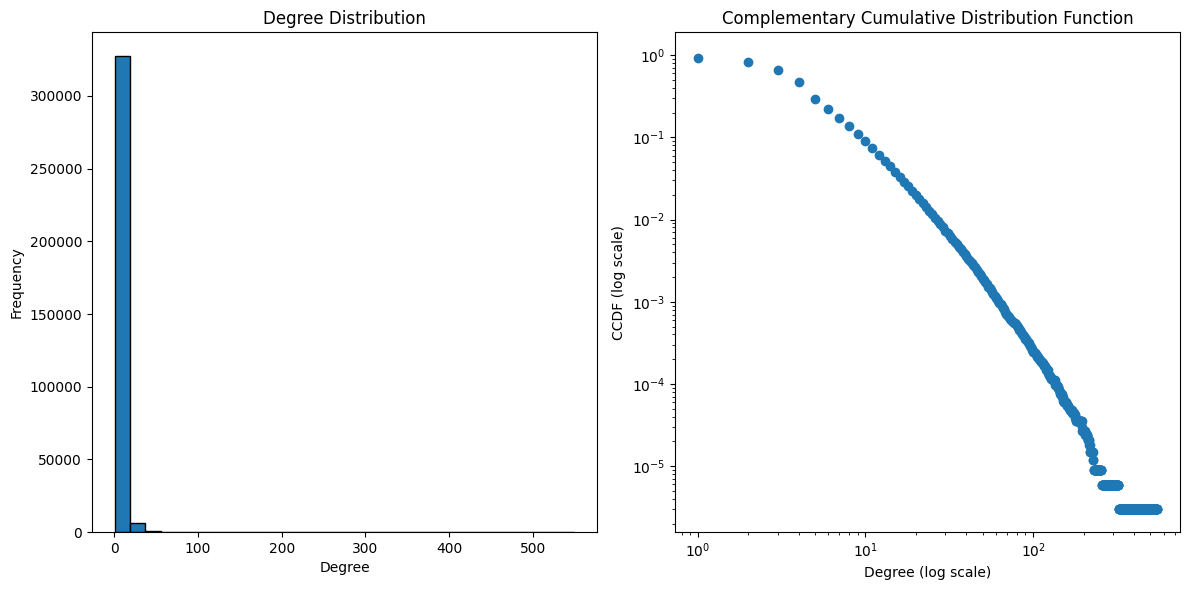

In [ ]:
def degree_distribution(G):
    

    # Degree distribution
    degrees = [d for _, d in G.degree()]
    #degree_hist = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 1))

    # CCDF
    degree_counts = np.bincount(degrees)
    ccdf = 1.0 - np.cumsum(degree_counts) / sum(degree_counts)

    # Plot
    plt.figure(figsize=(12, 6))

    # Degree Distribution
    plt.subplot(1, 2, 1)
    plt.hist(degrees, bins=30, edgecolor="k")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")

    # CCDF
    plt.subplot(1, 2, 2)
    plt.plot(range(len(ccdf)), ccdf, marker="o", linestyle="none")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("CCDF (log scale)")
    plt.title("Complementary Cumulative Distribution Function")

    plt.tight_layout()
    plt.show()

degree_distribution(G)
basic_graph_properties(G)

Properties after preprocessing:

Number of nodes: 158714
Number of edges: 486140
Density 3.8597894473296324e-05
Is undirected graph? True
Number of connected components: 2351
Size of largest connected component: 145592
Average cluster coefficient: 0.4988070226890526


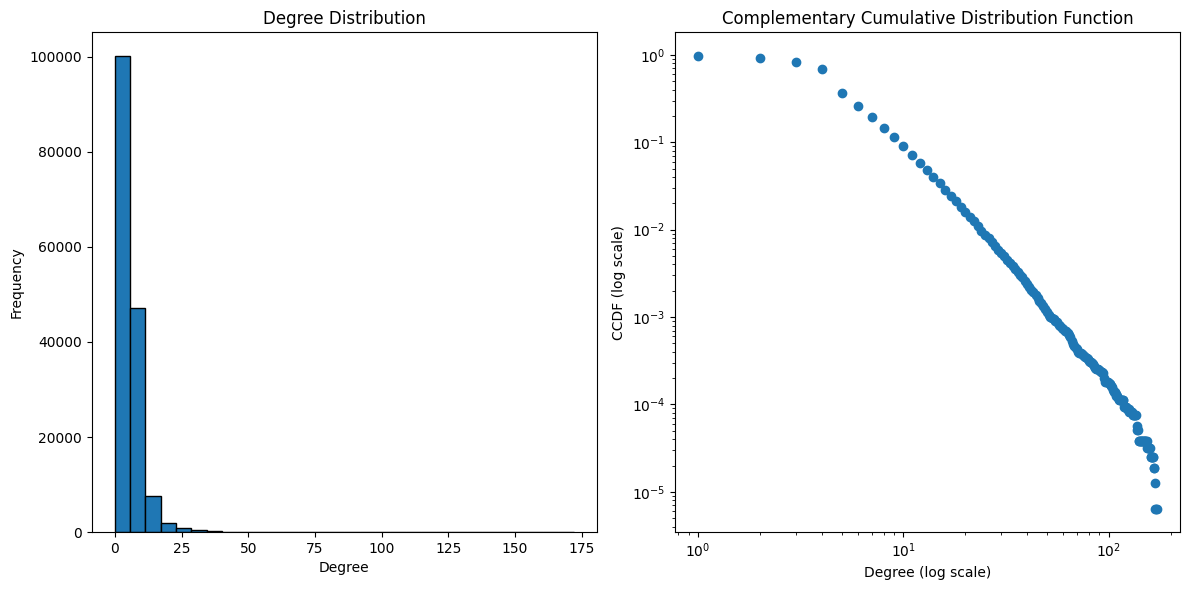

In [ ]:
def preprocessing(G):
    # Preprocessing examples
    G = nx.Graph(G)  # Convert to undirected (if necessary)
    G.remove_edges_from(nx.selfloop_edges(G))  # Remove self-loops
    G.remove_nodes_from(list(nx.isolates(G)))  # Remove isolated nodes

    # Optionally filter by degree
    degree_threshold = 5
    low_degree_nodes = [n for n, d in G.degree() if d < degree_threshold]
    G.remove_nodes_from(low_degree_nodes)
    return G

G = preprocessing(G)


print("Properties after preprocessing:\n")

degree_distribution(G)
basic_graph_properties(G)


# Task 4 – Graph Properties

## Explaination

**Number of nodes:**

Number of nodes is the number of Persons in the Network

**Number of edges:**

Number of Edges are the number of cennections in a Network

**Node with highest degree:**
The Node which has the highest number of connections


**Node with highest betweenness:**
...

---


**Average degree:**
...

---

**Max degree:**
...

---

**Number of connected components:**
...

---

**Transitivity:**

The Transitivity (Global Clustering Coefficient) is defined as the ratio of the number of closed triplets (triangles) to the total number of connected triplets of nodes in the graph. In sozial Networks: How many friends share the same friends as you do.

Let $(a_{a,v})_{u,v \in V}$ be the adjacency matrix of Graph G

transitivity of G is the fraction of closed triplets (3 nodes connected by three edges) among all dyads (three nodes connected by at least two edges)

$\frac{ \sum_{u,v,w \in V} a_{u,v} a_{v,w} a_{w,u} }{ \sum_{v \in V} deg(v) \cdot (deg(v) - 1) }$


0: No clustering (no triangles in the graph).

1: Perfect clustering (every possible triplet forms a triangle, as in a complete graph)

---

**Density:**

The [density](https://en.wikipedia.org/wiki/Dense_graph) of an undirected graph measures how "completet" the graph is. Its a measure of how many edges a graph has to the maximum possible number of edges. 
Complete graphs have a density D = 1 and a graph with no edges (empty graph) is D = 0.

Density is defined as:

$D = \frac{2 \cdot |E|}{|V|(|V|-1)}$

with:
- |E|: Number of edges
- |V|: Number of Nodes

**Diameter:**

The length of the longest shortest path in a graph is called the **diameter** of the graph.

**Average shortest path length:**

How quckly can information spread through the graph

**Efficiency:**

Is the average of the inverse shortest path lengths between to pairs of nodes. It measures how "efficient" the graph is in terms of connectivity and accessibility.


Erdős–Rényi random graph model with fix number of nodes and number of edges

In [ ]:
def compute_properties(G):
    properties = {
        "Number of nodes": G.number_of_nodes(),
        "Number of edges": G.number_of_edges(),
        "Node with highest degree": max(dict(G.degree()), key=lambda x: G.degree[x]),
        "Node with highest betweenness": max(nx.betweenness_centrality(G).items(), key=lambda x: x[1])[0],
        "Average degree": sum(dict(G.degree()).values()) / G.number_of_nodes(),
        "Max degree": max(dict(G.degree()).values()),
        #"Density": nx.density(G),
        "Number of connected components": nx.number_connected_components(G) if not G.is_directed() else "N/A",
        #"Diameter": nx.diameter(G) if nx.is_connected(G) else "Graph not connected",
        #"Average Shortest Path Length": nx.average_shortest_path_length(G) if nx.is_connected(G) else "Graph not connected",
        #"Efficiency": nx.global_efficiency(G),
        #"Transitivity": nx.transitivity(G),
        "Average Clustering Coefficient": nx.average_clustering(G),
        #"Assortativity": nx.degree_assortativity_coefficient(G),
    }
    return properties


start_time = time.time()
# Properties of G
properties_G = compute_properties(G)
end_time = time.time()
print(f'Time to compute properties for graph G: {end_time - start_time}')

# Erdős–Rényi Random Graphs   
random_properties_list = []

# Compute graph properties for different random Erdős–Rényi graphs with 10 different seeds
for seed in tqdm(range(10)):
    random_graph = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges(), seed=seed)
    random_properties = compute_properties(random_graph)
    random_properties_list.append(random_properties)  

# Compute averages of random graph properties
random_properties_avg = pd.DataFrame(random_properties_list).mean().to_dict()

# Compare properties
comparison = pd.DataFrame({"G Graph": properties_G, "Erdős-Rényi Avg": random_properties_avg})
display(comparison)


# Task 5 – Central Nodes

import networkx as nx
import pandas as pd

def compute_centrality_measures(G):
    centrality_measures = {
        #"Node": list(G.nodes()),
        "Degree Centrality": nx.degree_centrality(G),
        "Betweenness Centrality": nx.betweenness_centrality(G),
        "Closeness Centrality": nx.closeness_centrality(G),
        "Eigenvector Centrality": nx.eigenvector_centrality(G, max_iter=1000),
        "PageRank": nx.pagerank(G),
    }
    
    # Convert to DataFrame
    #df = pd.DataFrame(centrality_measures)
    return centrality_measures

centrality_df = compute_centrality_measures(G)
print(centrality_df)  # Preview the results


# Task 6 – Node Roles

# Task 7 – Community Discovery

# Task 8 – Conclusions and Future Work